# Graphviz Artifical Neural Networks visualisation 
> Graphviz scripts to create simple visualisations of feed-forward and recurrent neural networks

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [machine learning, jupyter, graphviz]
- image: images/graphviz_dotnets/example_network.jpeg
- search_exclude: false

# Graphviz scripts to create simple visualisations of neural networks
---

## Simple feed forward neural networks

Often while working with neural networks in Deep Learning and Machine Learning fields it is often easy to picturise the network architecture into a concise diagram which conveys lot of useful information. In what follows are some scripts that are inspired from [martisak dotnets](https://github.com/martisak/dotnets) github repo including a rudementry graphing script which generates a DOT lannguage script interpretable by [graphviz](https://graphviz.readthedocs.io/en/stable/). The script found on the github repo was later ported to [graphviz](https://graphviz.readthedocs.io/en/stable/) and expanded to add more functionalities to the script. The added functionalities enable activation function annotations and recurrent neural networks representation.

Firstly the [graphviz](https://graphviz.readthedocs.io/en/stable/) module is imported and some global variables are set

In [2]:
try:
    import graphviz as G
except ImportError as e:
    print('ModuleNotFoundError: "graphviz" package not available, install it with "pip install graphviz"')


# boolean variables to denote dense or sparse connections between layers
DENSE = True
SPARSE = False

PENWIDTH = '15'
FONT = 'Hilda 10'

Now the network architecture details are defined based on which a neural network will be graphed. The details include the number of nodes/perceptrons present in each layer, the type of connections between two layers. Since the connections are in-between layers, the length of *connections* list has to be 1 less than the length of *layers* list.

In [3]:
layer_nodes = [6, 4, 4, 4]
connections = [DENSE, DENSE, SPARSE] 
assert len(connections) == (len(layer_nodes) - 1), '"connections" array should be 1 less than the #layers'
for i, type_of_connections in enumerate(connections):
    if type_of_connections == SPARSE:
        assert layer_nodes[i] == layer_nodes[i+1], "If connection type is SPARSE then the number of nodes in the adjacent layers must be equal"

A graph in *graphviz* mainly consists of three components, namely, nodes, edges, and the graph itself. Just like defining a *class* while programming before creating an object, overhere the *graphviz* library provides a generic **Digraph** class which is to be instantiated with our desired object presets. The following piece of code instantiates a *directed graph* with some nodes, edges, and graph attributes based on which the graph will be drawn.

In [4]:
dot = G.Digraph(comment='Neural Network', 
                graph_attr={'nodesep':'0.04', 'ranksep':'0.05', 'bgcolor':'white', 'splines':'line', 'rankdir':'LR', 'fontname':FONT},
                node_attr={'fixedsize':'true', 'label':"", 'style':'filled', 'color':'none', 'fillcolor':'gray', 'shape':'circle', 'penwidth':PENWIDTH, 'width':'0.4', 'height':'0.4'},
                edge_attr={'color':'gray30', 'arrowsize':'.4'})

### Create nodes

In [5]:
for layer_no in range(len(layer_nodes)):
    with dot.subgraph(name='cluster_'+str(layer_no)) as c:
        c.attr(color='transparent') # comment this if graph background is needed
        if layer_no == 0:                 # first layer
            c.attr(label='Input')
        elif layer_no == len(layer_nodes)-1:   # last layer
            c.attr(label='Output')
        else:                      # layers in between
            c.attr(label='Hidden')
        for a in range(layer_nodes[layer_no]):
            if layer_no == 0: # or i == len(layers)-1: # first or last layer
                c.node('l'+str(layer_no)+str(a), '', fillcolor='black')#, fontcolor='white'
            if layer_no == len(layer_nodes)-1:
                c.node('l'+str(layer_no)+str(a), '', fontcolor='white', fillcolor='black')#, fontcolor='white'
            else:
                # unicode characters can be used to inside the nodes as follows
                # for a list of unicode characters refer this https://pythonforundergradengineers.com/unicode-characters-in-python.html
                c.node('l'+str(layer_no)+str(a), '\u03C3', fontsize='12') # to place "sigma" inside the nodes of a layer
                
                # for normal textual representation like 'relu' and 'tanh', the following approach can be taken
                # c.node('l'+str(layer_no)+str(a), 'relu', fontsize='12')

### Create edges

In [6]:
for layer_no in range(len(layer_nodes)-1):
    for node_no in range(layer_nodes[layer_no]):
        if connections[layer_no] == DENSE:
            for b in range(layer_nodes[layer_no+1]):
                dot.edge('l'+str(layer_no)+str(node_no), 'l'+str(layer_no+1)+str(b),)
        elif connections[layer_no] == SPARSE:
            dot.edge('l'+str(layer_no)+str(node_no), 'l'+str(layer_no+1)+str(node_no))                

### Render

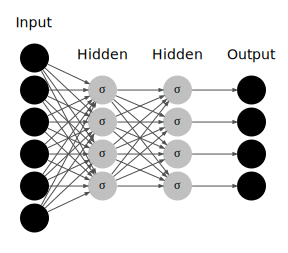

In [7]:
# to just visualise
dot

### Save/Export

In [8]:
dot.format = 'JPEG' # or PDF, SVG, JPEG, PNG, etc. 

In [9]:
# to save the file, pdf is default
dot.render('./example_network')

'./example_network.jpeg'

## Recurrent neural network

The previously used code can be modified and adapted easily for variuous architectures, for adding additional details, for customizing, and much more. The same code if now modified to represent recurrent neural networks instead.

In [9]:
layer_nodes = [6, 4, 4, 4]
connections = [DENSE, DENSE, DENSE]
# additional variable to denote which layers consist of recurrent units
recurrent = [False, True, True, False]

assert len(connections) == (len(layer_nodes) - 1), '"connections" array should be 1 less than the #layers'
for i, type_of_connections in enumerate(connections):
    if type_of_connections == SPARSE:
        assert layer_nodes[i] == layer_nodes[i+1], "If connection type is SPARSE then the number of nodes in the adjacent layers must be equal"

dot = G.Digraph(comment='Neural Network', 
                graph_attr={'nodesep':'0.04', 'ranksep':'0.05', 'bgcolor':'white', 'splines':'line', 'rankdir':'LR', 'fontname':FONT},
                node_attr={'fixedsize':'true', 'label':"", 'style':'filled', 'color':'none', 'fillcolor':'gray', 'shape':'circle', 'penwidth':PENWIDTH, 'width':'0.4', 'height':'0.4'},
                edge_attr={'color':'gray30', 'arrowsize':'.4'})

for layer_no in range(len(layer_nodes)):
    with dot.subgraph(name='cluster_'+str(layer_no)) as c:
        c.attr(color='transparent') # comment this if graph background is needed
        if layer_no == 0:                 # first layer
            c.attr(label='Input')
        elif layer_no == len(layer_nodes)-1:   # last layer
            c.attr(label='Output')
        else:                      # layers in between
            c.attr(label='Hidden')
        for a in range(layer_nodes[layer_no]):
            if layer_no == 0: # or i == len(layers)-1: # first or last layer
                c.node('l'+str(layer_no)+str(a), '', fillcolor='black')#, fontcolor='white'
            if layer_no == len(layer_nodes)-1:
                c.node('l'+str(layer_no)+str(a), '', fontcolor='white', fillcolor='black')#, fontcolor='white'
            else:
                # unicode characters can be used to inside the nodes as follows
                # for a list of unicode characters refer this https://pythonforundergradengineers.com/unicode-characters-in-python.html
                # c.node('l'+str(layer_no)+str(a), '\u03C3', fontsize='12') # to place "sigma" inside the nodes of a layer
                
                # for normal textual representation like 'relu' and 'tanh', the following approach can be taken
                c.node('l'+str(layer_no)+str(a), 'tanh', fontsize='12')
                
for layer_no in range(len(layer_nodes)-1):
    for node_no in range(layer_nodes[layer_no]):
        if connections[layer_no] == DENSE:
            # to place recuurent units
            # change the label 'x10' to denote the number of time steps into which the recurrent unit unrolls in time
            if recurrent[layer_no]:
                dot.edge('l'+str(layer_no)+str(node_no), 'l'+str(layer_no)+str(node_no), xlabel='x10', color='blue', fontcolor='blue')
            for b in range(layer_nodes[layer_no+1]):
                dot.edge('l'+str(layer_no)+str(node_no), 'l'+str(layer_no+1)+str(b),)
        elif connections[layer_no] == SPARSE:
            dot.edge('l'+str(layer_no)+str(node_no), 'l'+str(layer_no+1)+str(node_no))                

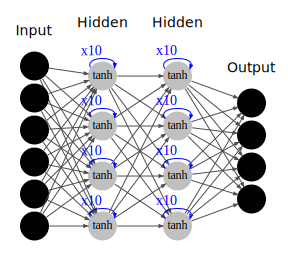

In [10]:
dot

### Save/Export

In [11]:
dot.format = 'pdf' # or PDF, SVG, JPEG, PNG, etc. 

In [12]:
# to save the file, pdf is default
dot.render('./example_recurrent_network')

'./example_recurrent_network.pdf'

## Some more additional scripts that are useful
---

## 1.Unrolled representation of a single recurrent unit

In [13]:
TIMESTEPS = 6
TIME_OFFSET = 3

unrolled = G.Digraph(node_attr={'shape':'circle', 'fixedsize':'true'}, graph_attr={'style':'invis', 'rankdir':'BT', 'color':'transparent'})

In [14]:
for step in range(TIMESTEPS+2):
    if step == 0 or step == TIMESTEPS+1:
        with unrolled.subgraph(name='cluster_'+str(i)) as c:
            c.node('a'+str(step), '', color='transparent')
            c.node('b'+str(step), '...', color='transparent') 
            c.node('c'+str(step), '', color='transparent')
            c.edge('a'+str(step), 'b'+str(step), style='invis') 
            c.edge('b'+str(step), 'c'+str(step), style='invis')
    else:
        with unrolled.subgraph(name='cluster_'+str(i)) as c:
            c.node('a'+str(step), '', color='transparent')
            c.node('b'+str(step), 't'+'{:=+d}'.format(TIME_OFFSET-step) if TIME_OFFSET-step else 't') 
            c.node('c'+str(step), '', color='transparent');
            c.edge('a'+str(step), 'b'+str(step)); c.edge('b'+str(step), 'c'+str(step));

In [15]:
# dot2.edge('a','b'); dot2.edge('b', 'c'); #dot2.edge('b', 'b');
for step in range(1, TIMESTEPS+2):
    unrolled.edge('b'+str(step-1), 'b'+str(step), constraint='false', dir='back', color='blue')

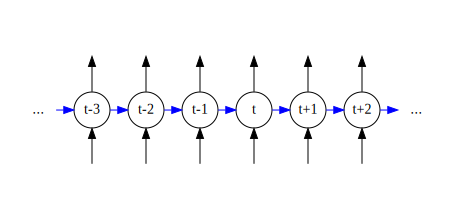

In [16]:
unrolled

In [17]:
unrolled.render('./unrolled')

'./unrolled.pdf'

## 2.Single recurrent unit

In [18]:
ru = G.Digraph(node_attr={'shape':'circle', 'fixedsize':'true'}, graph_attr={'style':'invis', 'rankdir':'LR'})

In [19]:
ru.node('a', '', color='transparent')
ru.node('b', 'N')
ru.node('c', '', color='transparent')
ru.edge('a', 'b')
ru.edge('b', 'c')
ru.edge('b', 'b', color='blue')

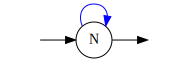

In [20]:
ru

In [21]:
ru.render('./rnn')

'./rnn.pdf'